# Exemplos iniciais de particionamento de dados

**Exemplo Amostragem Aleatória**

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split

# Exemplo de um conjunto desbalanceado, com 10% de ocorrência da categoria 1
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
print('y = ',y)

# Divisão aleatória
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('y_test = ',y_test)
print('y_train = ',y_train)

y =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1]
y_test =  [0 0 0 1 0 1 0 0 0 0]
y_train =  [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0]


**Exemplo Amostragem Estratificada**

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split

# Exemplo de um conjunto desbalanceado, com 10% de ocorrência da categoria 1
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
print('y = ',y)

y =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1]


In [36]:
# Amostragem estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('y_test = ',y_test)
print('y_train = ',y_train)

y_test =  [0 0 0 0 0 0 0 1 0 0]
y_train =  [0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0]


**Exemplo Divisão k-fold**

In [37]:
from numpy import array
from sklearn.model_selection import KFold

# Exemplo de um conjunto de dados
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# Configurando a divisão
kf = KFold(n_splits=3, random_state=42, shuffle=True)

# Usa a função split para fazer a divisão e mostra o resultado
for train, test in kf.split(data):
 print('y_train: %s, y_test: %s' % (data[train], data[test]))

y_train: [0.3 0.4 0.5 0.6], y_test: [0.1 0.2]
y_train: [0.1 0.2 0.4 0.5], y_test: [0.3 0.6]
y_train: [0.1 0.2 0.3 0.6], y_test: [0.4 0.5]


# Criando um conjunto de dados

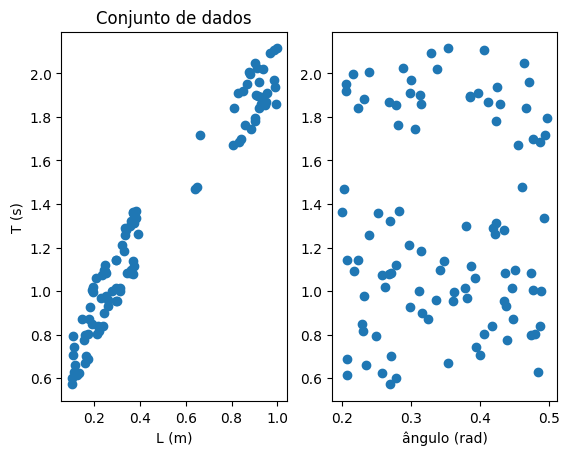

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Criando um conjunto de dados "de brinquedo": período, comprimento e abertura de um pêndulo simples
from numpy import random
L = np.concatenate([np.random.uniform(low=0.1, high=0.4, size=(64,1)), np.random.uniform(low=0.6, high=0.7, size=(3,1)) , np.random.uniform(low=0.8, high=1.0, size=(33,1))])
erro = np.random.uniform(low=0.0, high=0.3, size=(100,1)) - 0.15
T = 2*np.pi*np.sqrt(L/9.8) + erro # período em seg
ang = np.random.uniform(low=0.2, high=0.5, size=(100,1)) # ângulo de abertura em rad

plt.subplot(1, 2, 1)
plt.scatter(L, T)
plt.xlabel('L (m)')
plt.ylabel('T (s)')
plt.title('Conjunto de dados')
plt.subplot(1, 2, 2)
plt.scatter(ang, T)
plt.xlabel('ângulo (rad)')
plt.show()


# Regressão KNN com amostragem aleatória

Amostragem aleatória treino/teste

*Exercício: Na célula abaixo, adicione o ângulo de abertura (ang) no array de preditores (X), acrescentando 1 dimensão a mais para o problema. Observe se o desempenho do modelo melhora ou piora.*

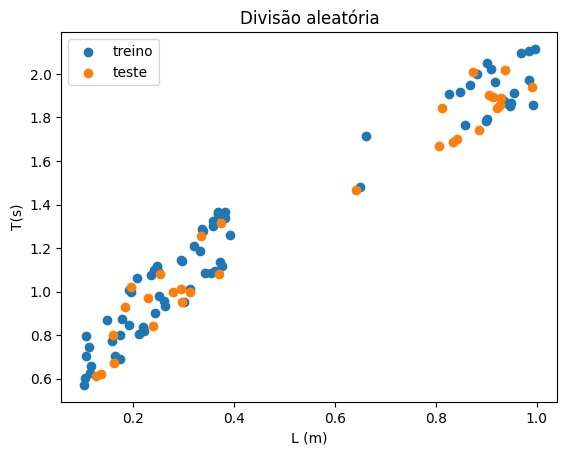

In [50]:
from sklearn.model_selection import train_test_split

# Variáveis preditoras (X) e variável alvo (y)
X = L # problema 1D
# X = np.hstack((L, ang)) # problema 2D
y = T

# Divisão aleatória em conjuntos de treino e teste
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7) #, random_state=100)

plt.scatter(X_train[:,0], y_train, label = 'treino')
plt.scatter(X_test[:,0], y_test, label = 'teste')
plt.legend(loc="upper left")
plt.xlabel('L (m)')
plt.ylabel('T(s)')
plt.title('Divisão aleatória')
plt.show()

Aplicando o regressor KNN para obter o período do pêndulo a partir do(s) preditor(es)

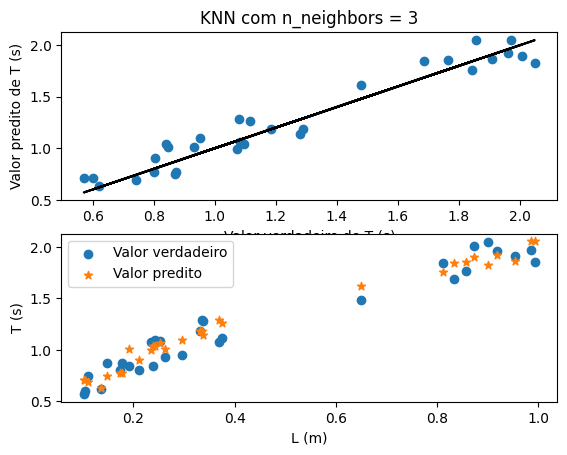

R^2 =  0.9359765350952027
MSE =  0.01445157516112021


In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Treinando o algoritmo KNN com k = 3 vizinhos
knn1 = KNeighborsRegressor(n_neighbors = 3)
knn1.fit(X_train, y_train)

# Aplicando o modelo treinado no conjunto de teste
y_pred = knn1.predict(X_test)

# Métricas de desempenho no conjunto de teste
mse = mean_squared_error(y_test,y_pred) # mean squared error
r2 = r2_score(y_test,y_pred) # R^2

plt.subplot(2, 1, 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color = 'black', label = 'x=y')
plt.xlabel('Valor verdadeiro de T (s)')
plt.ylabel('Valor predito de T (s)')
plt.title('KNN com n_neighbors = 3')
plt.subplot(2, 1, 2)
plt.scatter(X_test[:,0], y_test, label = 'Valor verdadeiro')
plt.scatter(X_test[:,0], y_pred, label = 'Valor predito', marker='*')
plt.legend(loc="upper left")
plt.xlabel('L (m)')
plt.ylabel('T (s)')
plt.show()

print('R^2 = ', r2)
print('MSE = ', mse)

Como escolher o melhor número de vizinhos (sintonizar hiperparâmetro)?

Text(0, 0.5, 'MSE')

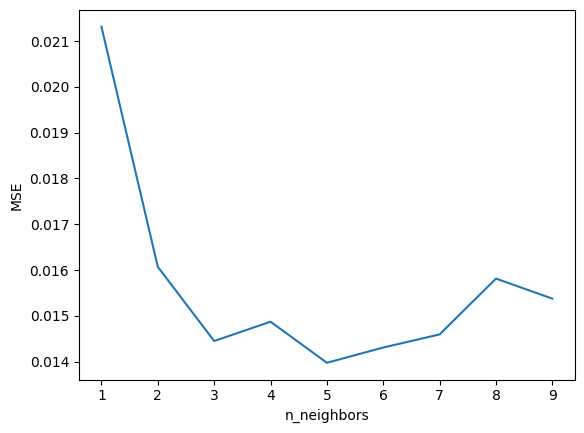

In [41]:
# Vamos avaliar como o MSE varia com a escolha de n_neighbors

k_list = np.arange(1,10,1) # n_neighbors variando entre 1 e 9
resposta = {} # dict para armazenar n_neighbors e MSE

for i in k_list:
    knn1 = KNeighborsRegressor(n_neighbors = int(i))
    knn1.fit(X_train, y_train) # treino do modelo
    y_pred = knn1.predict(X_test) # aplica o modelo treinado no conjunto de teste
    mse = mean_squared_error(y_test,y_pred)
    resposta[i] = mse

plt.plot(resposta.keys(), resposta.values())
plt.xlabel('n_neighbors')
plt.ylabel('MSE')

Aplicando o regressor KNN com n_neighbors otimizado

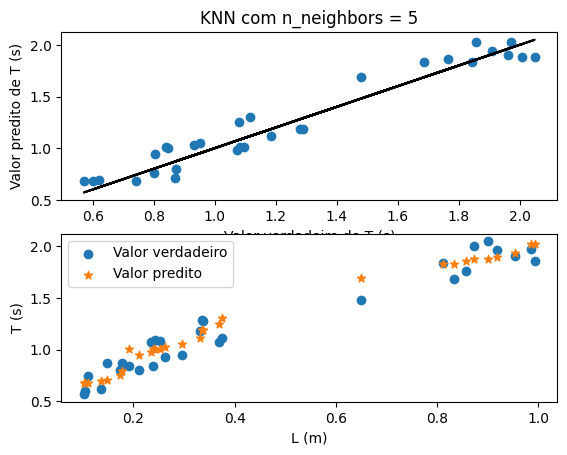

R^2 =  0.9380792179991813
MSE =  0.013976951051474874


In [42]:
melhor_n = min(resposta, key=resposta.get) # valor de n_neighbors que minimiza MSE

knn1 = KNeighborsRegressor(n_neighbors = melhor_n)
knn1.fit(X_train, y_train)

# Aplicando o modelo treinado no conjunto de teste
y_pred = knn1.predict(X_test)

# Métricas de desempenho no conjunto de teste
mse = mean_squared_error(y_test,y_pred) # mean squared error
r2 = r2_score(y_test,y_pred) # R^2

plt.subplot(2, 1, 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color = 'black', label = 'x=y')
plt.xlabel('Valor verdadeiro de T (s)')
plt.ylabel('Valor predito de T (s)')
plt.title('KNN com n_neighbors = ' + str(melhor_n))
plt.subplot(2, 1, 2)
plt.scatter(X_test[:,0], y_test, label = 'Valor verdadeiro')
plt.scatter(X_test[:,0], y_pred, label = 'Valor predito', marker='*')
plt.legend(loc="upper left")
plt.xlabel('L (m)')
plt.ylabel('T (s)')
plt.show()

print('R^2 = ', r2)
print('MSE = ', mse)




*Exercício: o modelo foi criado e otimizado, e está armazenado na variável knn1. O modelo está pronto para ser aplicado em outro conjunto de dados inéditos. Para isso, basta usar a função .predict, por exemplo:*

y_pred_novo = knn1.predict(X_novo)


*Crie um conjunto de dados inéditos para testar a capacidade de generalização do modelo. Use a equação do pêndulo simples para obter os valores verdadeiros de T em função de L. Em especial, verifique o desempenho do modelo para valores de L que não estavam presentes no conjunto de treino (0.4<L<0.6 e 0.7<L<0.8).*

# Regressão KNN com validação cruzada k-fold

In [43]:
from sklearn.model_selection import KFold

# Variáveis preditoras (X) e variável alvo (y)
X = L # problema 1D
# X = np.hstack((L, ang)) # problema 2D
y = T

# Configurando a divisão
kf = KFold(n_splits=5, shuffle=True, random_state=10)

# Usa a função split para fazer a divisão
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
  print(f"Split {i}:")
  print(f'  Train set: {len(train_index)}, Test set:{len(test_index)}')
  print(f"  Test:  index={test_index}")

Split 0:
  Train set: 80, Test set:20
  Test:  index=[ 1  2  3 14 19 26 37 38 41 43 46 53 59 60 66 68 74 79 92 95]
Split 1:
  Train set: 80, Test set:20
  Test:  index=[ 4  5  6 21 34 35 39 42 44 45 48 50 52 55 61 63 70 76 84 90]
Split 2:
  Train set: 80, Test set:20
  Test:  index=[ 7 10 17 20 24 32 47 56 58 67 71 80 81 83 86 87 96 97 98 99]
Split 3:
  Train set: 80, Test set:20
  Test:  index=[12 13 18 22 23 25 27 30 31 51 57 65 69 75 77 82 85 88 91 94]
Split 4:
  Train set: 80, Test set:20
  Test:  index=[ 0  8  9 11 15 16 28 29 33 36 40 49 54 62 64 72 73 78 89 93]


In [44]:
# Aplica a regressão KNN e obtém o valor de uma determinada métrica para cada Split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

score_mse = -cross_val_score(KNeighborsRegressor(n_neighbors = 3), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'MSE for each split: {score_mse}')

score_r2 = cross_val_score(KNeighborsRegressor(n_neighbors = 3), X, y, cv= kf, scoring="r2")
print(f'R^2 for each split: {score_r2}')

MSE for each split: [0.00864939 0.01264868 0.01374872 0.01020688 0.01557651]
R^2 for each split: [0.96087597 0.89381093 0.95042721 0.95140596 0.92239625]


n_neighbors 1:
  MSE in each split: [0.01400498 0.02432577 0.01249693 0.01929151 0.02296297]
n_neighbors 2:
  MSE in each split: [0.01220553 0.019778   0.01236323 0.01553634 0.01236569]
n_neighbors 3:
  MSE in each split: [0.00864939 0.01264868 0.01374872 0.01020688 0.01557651]
n_neighbors 4:
  MSE in each split: [0.00840628 0.01232832 0.01207885 0.00998519 0.01453754]
n_neighbors 5:
  MSE in each split: [0.01045253 0.01281504 0.01103038 0.00895308 0.01283939]
n_neighbors 6:
  MSE in each split: [0.00974671 0.01317195 0.01146636 0.01051369 0.01502111]
n_neighbors 7:
  MSE in each split: [0.00971356 0.01439494 0.01104341 0.01121171 0.01649385]
n_neighbors 8:
  MSE in each split: [0.01114336 0.01393158 0.01168821 0.01113317 0.01713289]
n_neighbors 9:
  MSE in each split: [0.01132859 0.01274645 0.0115851  0.01238616 0.01668073]


Text(0, 0.5, 'MSE')

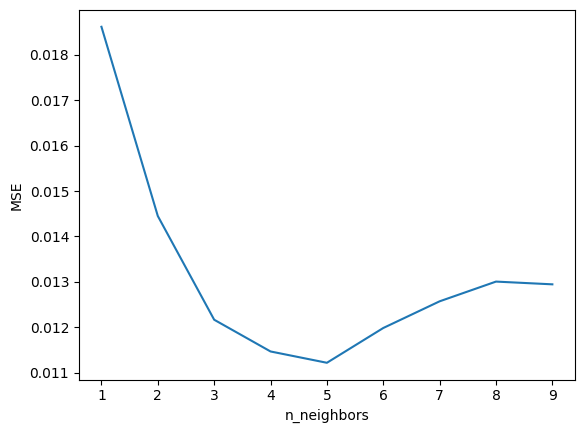

In [45]:
# Busca pelo melhor valor do hiperparâmetro n_neighbors, com base no MSE

k_list = np.arange(1,10,1) # n_neighbors variando entre 1 e 9
score = np.zeros(shape = (len(k_list),5), dtype=float) # array para armazenar n_neighbors e MSE

for i in k_list:
    score[i-1,:] = -cross_val_score(KNeighborsRegressor(n_neighbors = int(i)), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f"n_neighbors {i}:")
    print(f"  MSE in each split: {score[i-1,:]}")

# Calcula a média dos scores (MSE) em cada split
scoremean = np.mean(score, axis=1)

plt.plot(k_list, scoremean)
plt.xlabel('n_neighbors')
plt.ylabel('MSE')


In [46]:
# Agora que já caracterizamos o desempenho do modelo KNN e já ajustamos o hiperparâmetro n_neighbors,
# podemos treinar o modelo com todo o conjunto de dados, e eles estará pronto para
# fazer predições para valores inéditos.

melhor_n = k_list[np.where(scoremean == min(scoremean))] # valor de n_neighbors que minimiza MSE

knn2 = KNeighborsRegressor(n_neighbors = melhor_n[0])
knn2.fit(X, y)

KNeighborsRegressor()

*Exercício: o modelo foi criado e otimizado, e está armazenado em knn2. O modelo está pronto para ser aplicado em outro conjunto de dados inéditos. Para isso, basta usar a função .predict, por exemplo:*

y_pred_novo = knn2.predict(X_novo)


*Crie um conjunto de dados inéditos para testar a capacidade de generalização do modelo. Use a equação do pêndulo simples para obter os valores verdadeiros de T em função de L. Em especial, verifique o desempenho do modelo para valores de L que não estavam presentes no conjunto de treino (0.4<L<0.6 e 0.7<L<0.8).*